In [1]:
import pandas as pd

from visualization import view_curve
from stats import Distance, SuffixAverage, avg_dist_to_suffix_avg

### Quantifying differences between plots

In [2]:
orth_preds = pd.read_csv('../results/echantinom_orth_preds.csv')
orth_preds_x10 = pd.read_csv('../results/echantinom_orth_preds_x10.csv')

### Comparison of individual words with average suffix

Euclidean distance between "action" and average of all words with suffix "ion" : 0.04

Run 1 of 1:


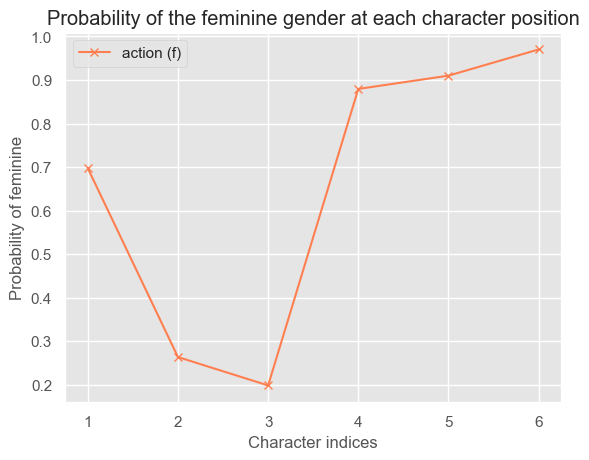

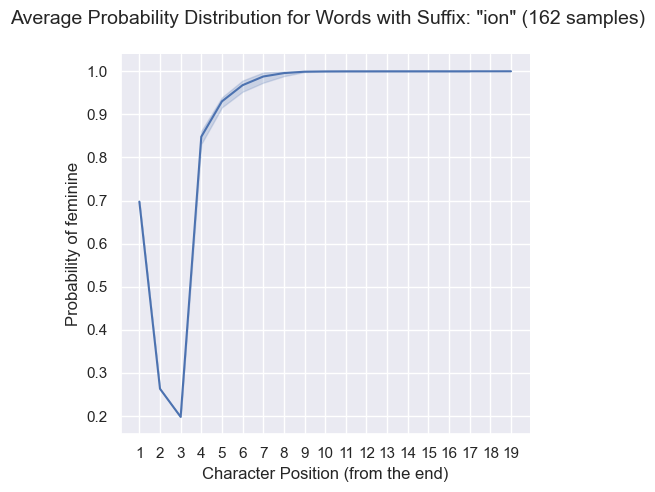

In [9]:
word = 'action'
suffix = 'ion'
gender = 'f'

distance = Distance(orth_preds)
sfx_avg = SuffixAverage(orth_preds, suffix)
sfx_avg_probs = sfx_avg.prob(gender=gender)

print(f'Euclidean distance between "{word}" and average of all words with suffix "{suffix}" : {distance.euclidean(word, sfx_avg_probs):.2f}\n')

view_curve([word], orth_preds, binary=True, gender=gender)
sfx_avg.plot(gender=gender)

In [5]:
suffixes = orth_preds.suffix.value_counts().to_dict()

# The selected gender has an impact on the average distances
# With gender set to 'f', the feminine suffixes have artificially lower average distances than masculine ones and vice versa 

pd.DataFrame({
    'suffix': suffixes.keys(),
    'avg_dist_to_suffix_avg': [avg_dist_to_suffix_avg(orth_preds, sfx, 'True', 2) for sfx in suffixes.keys()],
    'num_samples': suffixes.values()
})

,suffix,avg_dist_to_suffix_avg,num_samples
0,0,0.69,2654
1,eurM,0.10,193
2,ment,0.00,184
3,ion,0.08,162
4,age,0.03,99
...,...,...,...
108,i,0.00,1
109,ère,0.00,1
110,enne,0.00,1
111,ange,0.00,1


### Comparing the averages of different suffixes

Euclidean distance between average of all words with suffix "eurM" & average of all word with suffix "eurF": 0.11


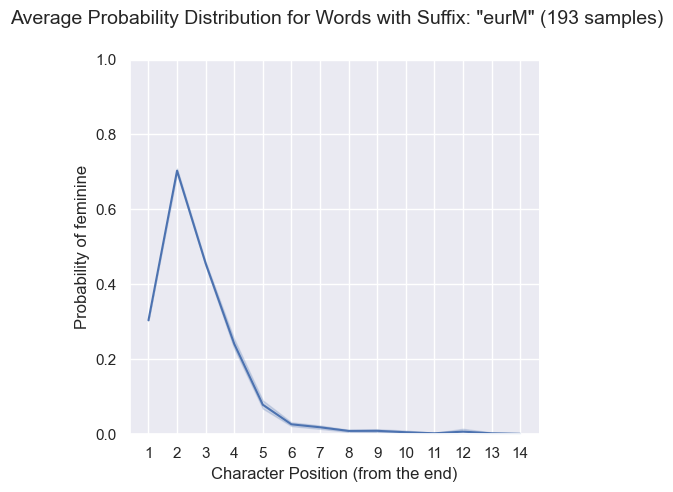

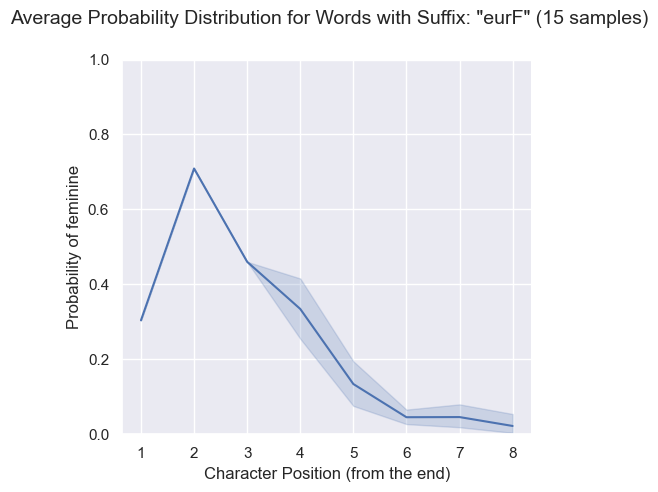

In [6]:
sfx_a = 'eurM'
sfx_b = 'eurF'

sfx_a_avg = SuffixAverage(orth_preds, sfx_a)
sfx_a_avg_probs = sfx_a_avg.prob(gender='f')

sfx_b_avg = SuffixAverage(orth_preds, sfx_b)
sfx_b_avg_probs = sfx_b_avg.prob(gender='f')

print(f'Euclidean distance between average of all words with suffix "{sfx_a}" & average of all word with suffix "{sfx_b}": {distance.euclidean(sfx_a_avg_probs, sfx_b_avg_probs):.2f}')

sfx_a_avg.plot(gender='f', min_dp=3, scale=True)
sfx_b_avg.plot(gender='f', min_dp=3, scale=True)

Euclidean distance between average of all words with suffix "on" & average of all word with suffix "ion": 3.18


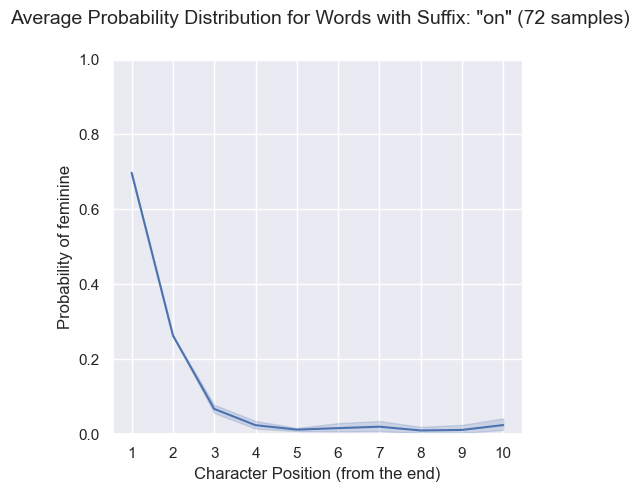

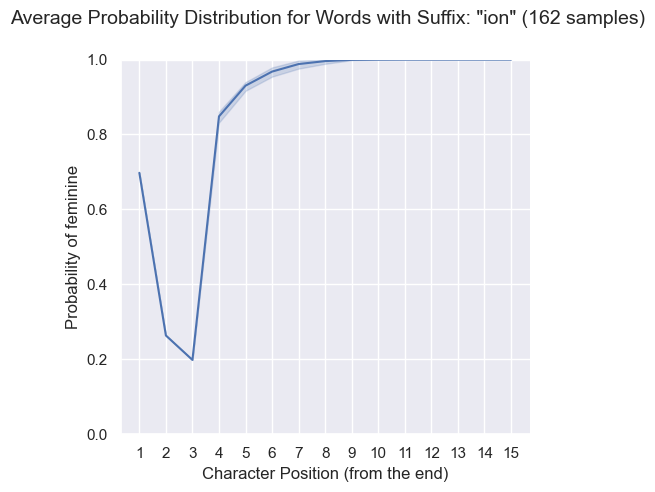

In [7]:
sfx_a = 'on'
sfx_b = 'ion'

sfx_a_avg = SuffixAverage(orth_preds, sfx_a)
sfx_a_avg_probs = sfx_a_avg.prob(gender='f')

sfx_b_avg = SuffixAverage(orth_preds, sfx_b)
sfx_b_avg_probs = sfx_b_avg.prob(gender='f')

print(f'Euclidean distance between average of all words with suffix "{sfx_a}" & average of all word with suffix "{sfx_b}": {distance.euclidean(sfx_a_avg_probs, sfx_b_avg_probs):.2f}')

sfx_a_avg.plot(gender='f', min_dp=3, scale=True)
sfx_b_avg.plot(gender='f', min_dp=3, scale=True)